In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install openpyxl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 242 kB 895 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=aa3e1077b523aadf53ed736c00c3be087fbd01b314af4b7f817aeb49a757adec
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
/kaggle/input/best-restaurants-in-germany/Best Restaurants in Germany.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Print the number of restaurants per city

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               3444 non-null   float64
 1   Restaurant         3444 non-null   object 
 2   Quality Score      3444 non-null   float64
 3   Postal Code        3444 non-null   object 
 4   City               3444 non-null   object 
 5   Open for Lunch     3444 non-null   object 
 6   Open for Dinner    3444 non-null   object 
 7   Open for Midday    3444 non-null   object 
 8   Plant Holidays     3444 non-null   object 
 9   Price Per Person   2738 non-null   object 
 10  Courses            2738 non-null   object 
 11  Chef               3229 non-null   object 
 12  Culinary Category  3356 non-null   object 
 13  Stars              3444 non-null   float64
dtypes: float64(3), object(11)
memory usage: 379.1+ KB


<function matplotlib.pyplot.legend(*args, **kwargs)>

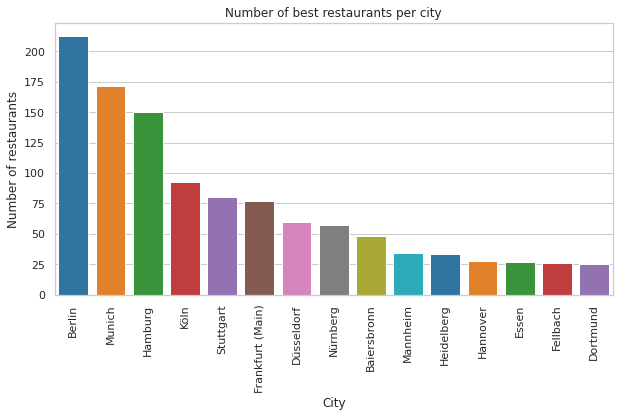

In [3]:
path = "../input/best-restaurants-in-germany/Best Restaurants in Germany.xlsx"

df = pd.read_excel(path)

df.describe()
df.columns
df.info()

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:15].index, palette="tab10")
plt.title("Number of best restaurants per city")
plt.ylabel("Number of restaurants", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=90)
plt.legend
#plt.savefig("../number_of_restaurants.png", dpi=600, bbox_inches="tight"); ## Optional, save a png-file to your folder

## Where is the most expensive restaurant?

In [4]:
#Convert column to float after splitting on "€"
df["Price Per Person"] = df["Price Per Person"].astype(str)
df["Price Per Person"] = df["Price Per Person"].apply(lambda x: x.split("€")[0])
df["Price Per Person"] = df["Price Per Person"].astype(float)

In [5]:
city_price_rank = df.groupby(["City"]).agg({"Price Per Person" : "mean", "Rank" : "mean"})

In [6]:
sorted_city_price_rank = city_price_rank.sort_values(by="Price Per Person", ascending=False)
sorted_city_price_rank.head(5)

,Price Per Person,Rank
City,,
Bergisch Gladbach,274.363636,125.545455
Perl,265.000000,3.000000
Rantum (Sylt),254.000000,13.000000
Dreis,230.000000,5.000000
Rottach-Egern,226.550000,169.041667


In [7]:
city_price_rank15 = sorted_city_price_rank.head(15)

In [8]:
city_price_rank15.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Bergisch Gladbach'),
  Text(1, 0, 'Perl'),
  Text(2, 0, 'Rantum (Sylt)'),
  Text(3, 0, 'Dreis'),
  Text(4, 0, 'Rottach-Egern'),
  Text(5, 0, 'Tinnum (Sylt)'),
  Text(6, 0, 'Geisenheim'),
  Text(7, 0, 'Elmau'),
  Text(8, 0, 'Aschau'),
  Text(9, 0, 'Glücksburg'),
  Text(10, 0, 'Wirsberg'),
  Text(11, 0, 'Sulzburg'),
  Text(12, 0, 'Aerzen'),
  Text(13, 0, 'Cuxhaven'),
  Text(14, 0, 'Leipzig')])

<Figure size 720x360 with 0 Axes>

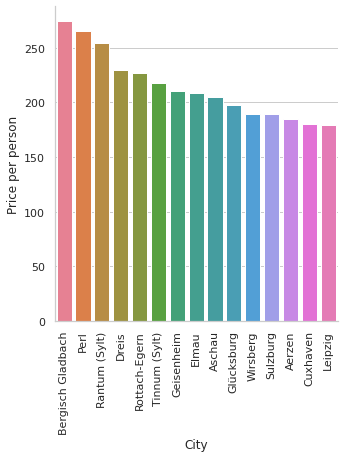

In [9]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.catplot(x="City", y="Price Per Person", data=city_price_rank15, kind="bar", palette="husl")
plt.ylabel("Price per person", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=90)
#plt.savefig("../price_per_person.png", dpi=600, bbox_inches="tight"); ## Optional, save a png-file to your folder

## How many stars are most common?

In [10]:
df.value_counts("Stars")

Stars
3.0    1725
2.0     946
4.0     397
1.0     198
5.0     178
dtype: int64

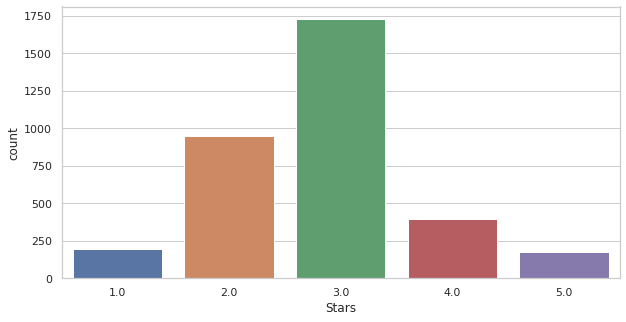

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Stars", data=df);

## Number of courses depending on stars

In [12]:
df["Courses_int"] = df["Courses"].astype(str)
df["Courses_int"] = df["Courses_int"].apply(lambda x: x.split(" ")[0])
df["Courses_int"] = df["Courses_int"].astype(float)

In [13]:
stars_courses = df[["Stars", "Courses_int"]]

In [14]:
star_cours = stars_courses.groupby("Stars").aggregate({"Courses_int" : "mean"})

<Figure size 720x360 with 0 Axes>

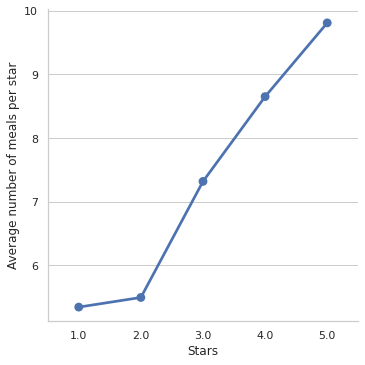

In [15]:
plt.figure(figsize=(10, 5))
star_cours.reset_index(inplace=True)
sns.catplot(x="Stars", y="Courses_int", data=star_cours, kind="point")
plt.ylabel("Average number of meals per star", fontsize=12)
plt.xlabel("Stars", fontsize=12);

## Check if price per person and number of courses determine stars

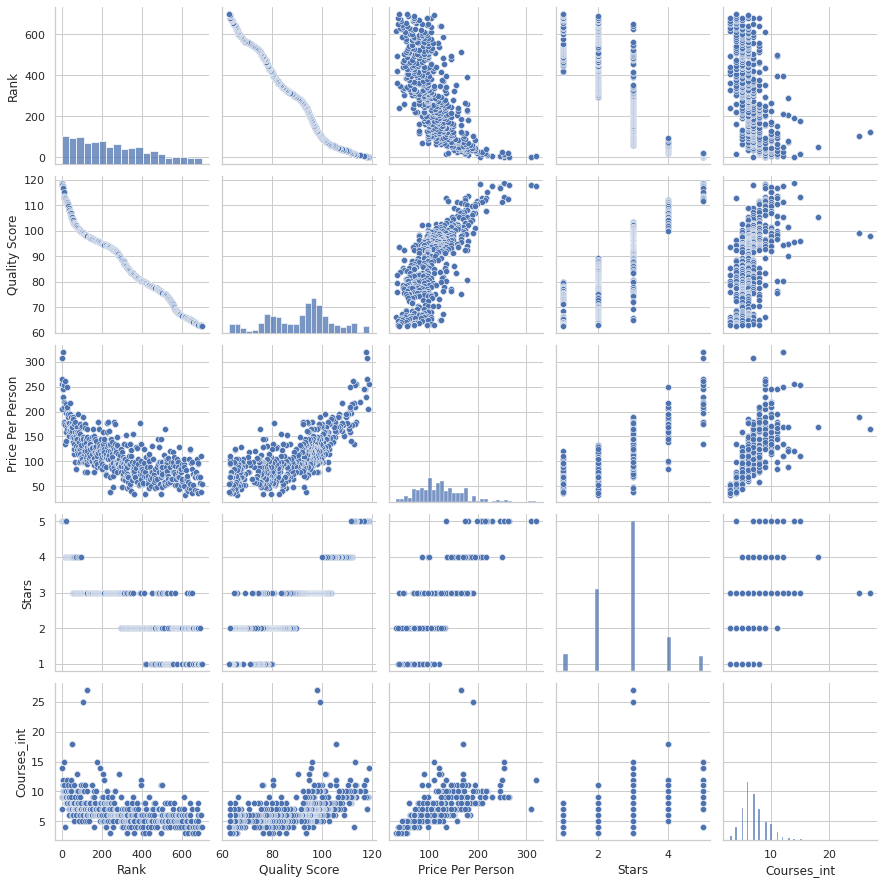

In [16]:
sns.pairplot(df);

<Figure size 720x360 with 0 Axes>

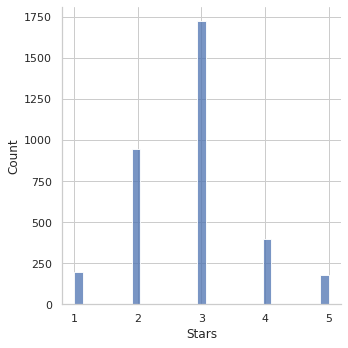

In [17]:
plt.figure(figsize=(10, 5))
sns.displot(df["Stars"]);

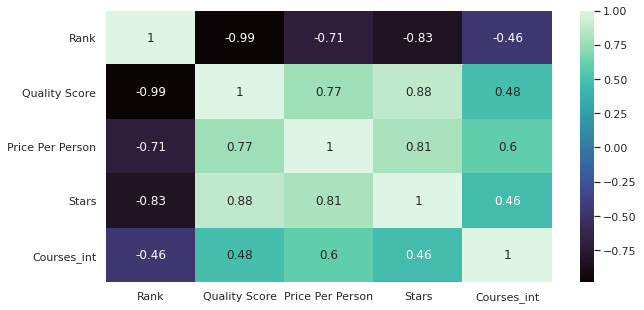

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="mako");

## Do a simple regression (y=stars, x=price per person, number of courses)

In [19]:
df.columns

Index(['Rank', 'Restaurant', 'Quality Score', 'Postal Code', 'City',
       'Open for Lunch', 'Open for Dinner', 'Open for Midday',
       'Plant Holidays', 'Price Per Person', 'Courses', 'Chef',
       'Culinary Category', 'Stars', 'Courses_int'],
      dtype='object')

In [20]:
df.fillna(value=0, inplace=True)
df.isna().sum()

Rank                 0
Restaurant           0
Quality Score        0
Postal Code          0
City                 0
Open for Lunch       0
Open for Dinner      0
Open for Midday      0
Plant Holidays       0
Price Per Person     0
Courses              0
Chef                 0
Culinary Category    0
Stars                0
Courses_int          0
dtype: int64

In [21]:
X = df[['Price Per Person', 'Courses_int']]
y = df["Stars"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

1.8703074835494653


In [24]:
lm.coef_

array([ 0.01345052, -0.06917794])

In [25]:
X_train.columns

Index(['Price Per Person', 'Courses_int'], dtype='object')

In [26]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])

In [27]:
cdf

,Coeff
Price Per Person,0.013451
Courses_int,-0.069178


## Culinary variety of restaurants

In [28]:
culinary_cat = df.value_counts(subset="Culinary Category", ascending=False)
df_culinary_cat = pd.DataFrame(culinary_cat)
df_culinary_cat.reset_index(inplace=True)
culinary_cat15 = df_culinary_cat.head(15)
culinary_cat15.rename(columns={0 : "category"}, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


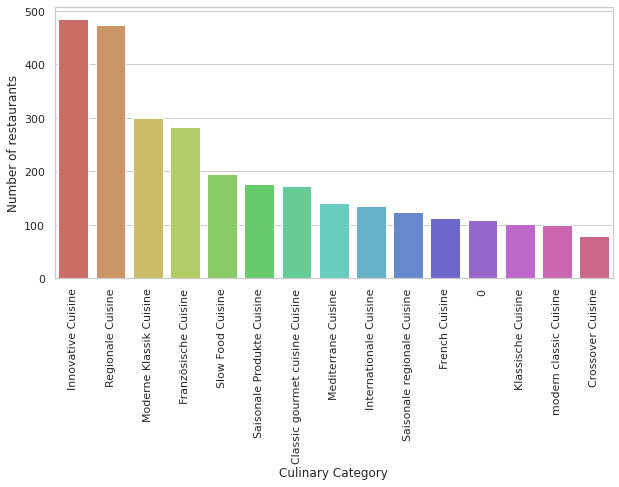

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Culinary Category", y="category", data=culinary_cat15, palette="hls")
plt.ylabel("Number of restaurants", fontsize=12)
plt.xlabel("Culinary Category", fontsize=12)
plt.xticks(rotation=90);